# Load Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [3]:
# Load location data
tile = pd.read_csv('data/cleaned/tile.csv')
cozie_location = pd.read_csv('data/cleaned/cozie_location.csv')

# Load wearables data
cozie_watch_survey = pd.read_csv('data/cleaned/cozie_watch_survey.csv')
kestrel = pd.read_csv('data/cleaned/kestrel.csv')
cozie_physiological = pd.read_csv('data/cleaned/cozie_physiological.csv')

# Convert to datetime
tile['datetime'] = pd.to_datetime(tile['datetime'])
cozie_watch_survey['datetime'] = pd.to_datetime(cozie_watch_survey['datetime'])
cozie_location['datetime'] = pd.to_datetime(cozie_location['datetime'])
kestrel['datetime'] = pd.to_datetime(kestrel['datetime'])
cozie_physiological['datetime'] = pd.to_datetime(cozie_physiological['datetime'])

# Drop duplicates
cozie_location = cozie_location.drop_duplicates()
tile = tile.drop_duplicates()
cozie_physiological = cozie_physiological.drop_duplicates()

## Drop semi_outdoor labels

In [4]:
# # Drop all except first 3 columns
# indoor_outdoor_labels = cozie_watch_survey.iloc[:, :3]

# # Drop rows where general_location is "Semi-outdoor"
# indoor_outdoor_labels = indoor_outdoor_labels[indoor_outdoor_labels["general_location"] != "Semi-outdoor"]

# Count of Raw Data Overview

| Data Source            | Number of Records | Number of Columns |
|------------------------|------------------|------------------|
| Tile Location         | 74,340           | 6                |
| Cozie Location       | 27,024           | 9                |
| Survey Responses      | 2,507            | 21               |
| Kestrel              | 401,936          | 6                |
| Physiological        | 196,701          | 12               |
| Indoor-Outdoor Labels | 2,288            | 3                |

# Display Raw Data

In [5]:
# print(indoor_outdoor_labels.shape)
# indoor_outdoor_labels.head(3)

In [6]:
# # value count of general_location
# indoor_outdoor_labels["general_location"].value_counts()

In [7]:
cozie_physiological.head(10)

,datetime,participant_id,trigger,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance,audio_exposure_headphones,sleep_in_bed,sleep_unspecified
0,2024-03-20 17:59:00,malta01,application_appear,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-20 17:59:00,malta01,watch_survey,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-03-20 18:01:00,malta01,watch_survey,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-20 18:01:00,malta01,application_appear,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-03-20 18:05:00,malta01,application_appear,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-03-20 18:05:00,malta01,watch_survey,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-03-20 18:12:00,malta01,watch_survey,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-03-20 18:12:00,malta01,location_change,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-03-20 18:14:00,malta01,location_change,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-03-20 18:15:00,malta01,watch_survey,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# missing values in cozie_physiological
cozie_physiological.isnull().sum() / cozie_physiological.shape[0] * 100

datetime                      0.000000
participant_id                0.000000
trigger                       0.000000
heart_rate                   48.780637
heart_rate_resting           99.837825
heart_rate_variability       98.883585
stand_time                   92.101718
step_count                   86.291885
walking_distance             62.348946
audio_exposure_headphones    99.662432
sleep_in_bed                 99.671583
sleep_unspecified            99.987799
dtype: float64

In [9]:
cozie_watch_survey.head(3)

,datetime,participant_id,general_location,past_activity,public_transit,transit_type,transit_time,air_temp_change,thermal_sensation,heat_stress,...,heat_symptoms,behaviour_adjustments,wind_speed,humidity_level,sun_intensity,shading,environment_preference,clothing_insulation,clothing_cover,clothing_color
0,2024-03-20 17:57:00,malta01,Indoor,Sitting,No,NaN,NaN,NaN,Neutral,No,...,NaN,NaN,mild,Neutral,not exposed,Buildings,No change,Light,25%-50%,Dark
1,2024-03-20 18:32:00,malta01,Semi-outdoor,Walking,Yes,Bus,20min,Yes,Neutral,No,...,NaN,NaN,mild,Neutral,not exposed,Shade structures,No change,Light,25%-50%,Dark
2,2024-03-20 18:46:00,malta01,Semi-outdoor,Standing,Yes,Bus,20min,NaN,Neutral,No,...,NaN,NaN,mild,Neutral,not exposed,Shade structures,No change,Light,25%-50%,Dark


In [10]:
kestrel.head(3)

,datetime,participant_id,temperature,relative_humidity,heat_index,dew_point
0,2024-03-22 11:10:00,malta02,29.800000,67.600000,34.700000,23.100000
1,2024-03-22 11:11:00,malta02,29.800147,67.599032,34.700147,23.099916
2,2024-03-22 11:12:00,malta02,29.800295,67.598063,34.700295,23.099832


In [11]:
print(cozie_location.shape)
cozie_location.head()

(27024, 9)


,datetime,participant_id,trigger,latitude,longitude,altitude,location_accuracy_horizontal,location_accuracy_vertical,location_error
0,2024-03-20 17:57:00,malta01,watch_survey,1.303680,103.773538,42.282772,35.00000,28.002558,44.823468
1,2024-03-20 18:28:00,malta01,location_change,1.303622,103.774365,24.000000,35.00000,26.000000,43.600459
2,2024-03-20 18:32:00,malta01,watch_survey,1.301342,103.774213,24.428770,1201.32663,53.011387,1202.495688
3,2024-03-20 18:32:00,malta01,location_change,1.299036,103.775594,21.000000,48.00000,3.000000,48.093659
4,2024-03-20 18:32:00,malta01,location_change,1.298780,103.775585,24.000000,30.00000,24.000000,38.418745


In [12]:
print(tile.shape)
tile.head()

(74340, 6)


,datetime,participant_id,location_timestamp,latitude,longitude,precision
0,2024-03-22 09:52:00,malta01,1.711072e+12,1.294803,103.816127,9.343360
1,2024-03-22 09:54:00,malta01,1.711072e+12,1.296278,103.807680,91.089510
2,2024-03-22 09:56:00,malta01,1.711073e+12,1.295914,103.807020,89.569580
3,2024-03-22 09:56:00,malta01,1.711073e+12,1.296169,103.806994,21.215336
4,2024-03-22 09:58:00,malta01,1.711073e+12,1.296107,103.807310,43.000000


# Data Cleaning

###  Merge - tile and cozie location 

1. merge tile and location data to get 100k location data

In [13]:
# Drop columns from cozie location
cozie_location_to_drop = ['trigger', 'location_error', 'location_accuracy_horizontal', 'location_accuracy_vertical', 'altitude']
cozie_location_dropped = cozie_location.drop(columns=cozie_location_to_drop)

# Drop columns from tile
tile_to_drop = ['location_timestamp', 'precision']
tile_dropped = tile.drop(columns=tile_to_drop)

In [14]:
print(cozie_location.shape)
cozie_location_dropped.head()

(27024, 9)


,datetime,participant_id,latitude,longitude
0,2024-03-20 17:57:00,malta01,1.303680,103.773538
1,2024-03-20 18:28:00,malta01,1.303622,103.774365
2,2024-03-20 18:32:00,malta01,1.301342,103.774213
3,2024-03-20 18:32:00,malta01,1.299036,103.775594
4,2024-03-20 18:32:00,malta01,1.298780,103.775585


In [15]:
print(tile_dropped.shape)
tile_dropped.head()

(74340, 4)


,datetime,participant_id,latitude,longitude
0,2024-03-22 09:52:00,malta01,1.294803,103.816127
1,2024-03-22 09:54:00,malta01,1.296278,103.807680
2,2024-03-22 09:56:00,malta01,1.295914,103.807020
3,2024-03-22 09:56:00,malta01,1.296169,103.806994
4,2024-03-22 09:58:00,malta01,1.296107,103.807310


In [16]:
# Merge cozie_location and tile
all_location = pd.concat([cozie_location_dropped, tile_dropped], axis=0)
# print shape
print(all_location.shape)

# Drop duplicates
all_location = all_location.drop_duplicates()

# print shape
print(all_location.shape)

(101364, 4)
(100968, 4)


#### Notes
- we drop all columns except datetime, id, lat and lon, so that we can merge tile and cozie location data.
- future work shuold focus on aligning these features before the study begins.
- this gives us about `100k` location data.

### Remove duplicates - Physiological

1. Remove irrelevant / high missing values columns
2. Aggregate the values due to duplicate datetime-participant id from different logging devices, app open + location change.

In [17]:
# Drop high missing value / irrelevant columns from cozie physiological
cozie_physiological_to_drop = ['audio_exposure_headphones', 'sleep_in_bed', 'sleep_unspecified', 'trigger']  
cozie_physiological_dropped = cozie_physiological.drop(columns=cozie_physiological_to_drop)

In [18]:
# View which rows are duplicated on datetime and participant_id
cozie_physiological_dropped[cozie_physiological_dropped.duplicated(subset=['datetime', 'participant_id'], keep=False)].sort_values(by=['datetime', 'participant_id']).head()

,datetime,participant_id,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance
0,2024-03-20 17:59:00,malta01,93.0,NaN,NaN,NaN,NaN,NaN
1,2024-03-20 17:59:00,malta01,93.0,NaN,NaN,NaN,NaN,NaN
2,2024-03-20 18:01:00,malta01,91.0,NaN,NaN,NaN,NaN,NaN
3,2024-03-20 18:01:00,malta01,91.0,NaN,NaN,NaN,NaN,NaN
4,2024-03-20 18:05:00,malta01,81.0,NaN,NaN,NaN,NaN,NaN


In [19]:
# Group by 'datetime' and 'participant_id' and aggregate the values.
cozie_physiological_grouped = cozie_physiological_dropped.groupby(['datetime', 'participant_id']).agg('mean').reset_index()

In [20]:
# check the subsets again
cozie_physiological_grouped[cozie_physiological_grouped.duplicated(subset=['datetime', 'participant_id'], keep=False)].sort_values(by=['datetime', 'participant_id']).head()

,datetime,participant_id,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance


In [21]:
# print shape
print(cozie_physiological_grouped.shape)
cozie_physiological_grouped.head(3)

(90300, 8)


,datetime,participant_id,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance
0,2024-03-20 17:59:00,malta01,93.0,NaN,NaN,NaN,NaN,NaN
1,2024-03-20 18:01:00,malta01,91.0,NaN,NaN,NaN,NaN,NaN
2,2024-03-20 18:05:00,malta01,81.0,NaN,NaN,NaN,NaN,NaN


### Remap labels -  `semi-outdoor` label in `general_location`

for semi-outdoor, we remap it to each participant’s minority value.
the assumption here is that for eg if the participant has high outdoor count but low indoor count, it is more likely that semi-outdoor is similiar to indoor then outdoor. 

for participants where the semi-outdoor label is present, however the count of outdoor and indoor label is very close - meaning the participant has a very strong distinction between the two labels, we drop semi-outdoor instead of remapping as the assumption might not hold here.

this allows us to keep the data logged for semi-outdoor with dropping them, adding about another 300 labeled data to the training dataset. 

In [22]:
# Drop all except first 3 columns
labels = cozie_watch_survey.iloc[:, :3]
labels.head(3)

,datetime,participant_id,general_location
0,2024-03-20 17:57:00,malta01,Indoor
1,2024-03-20 18:32:00,malta01,Semi-outdoor
2,2024-03-20 18:46:00,malta01,Semi-outdoor


the plot below shows the distribution of target labels among the participants.

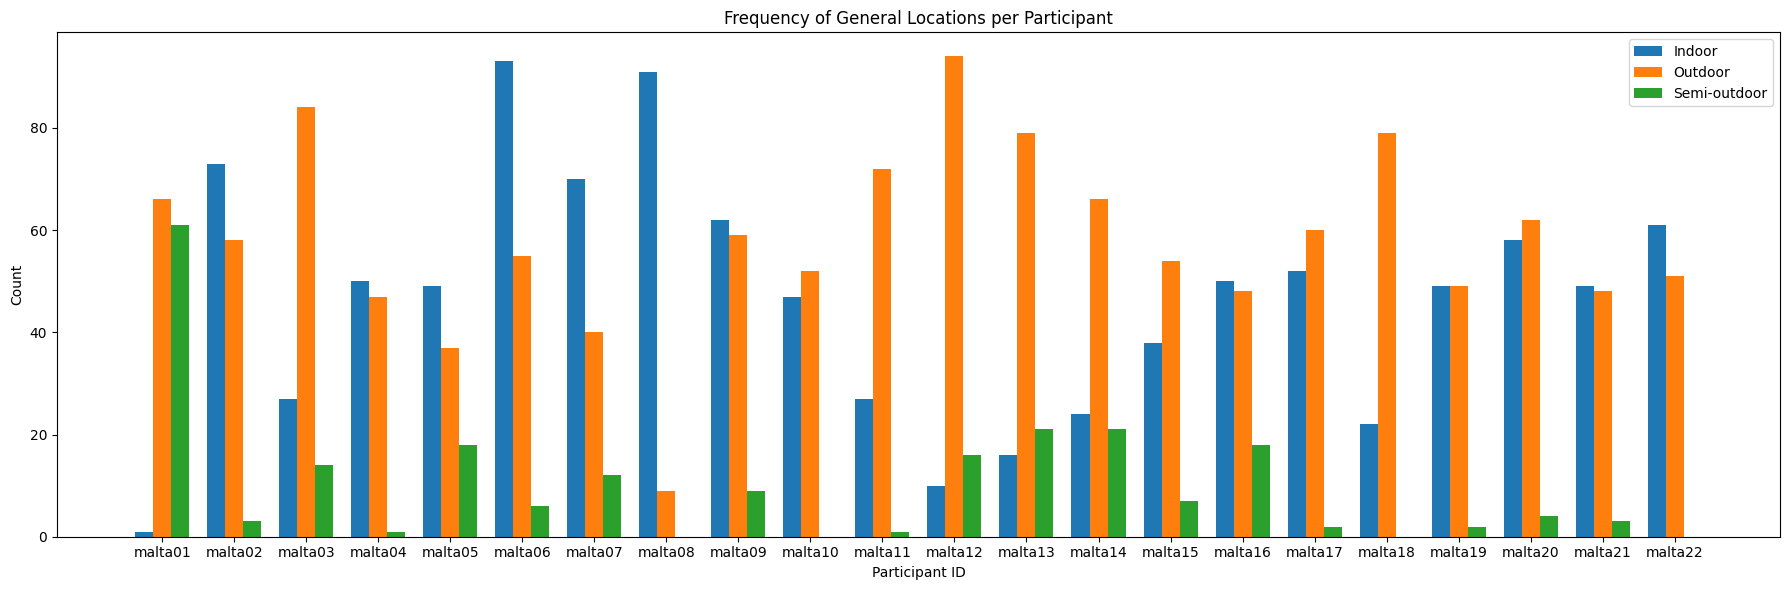

In [23]:
# Group by participant_id and general_location and count occurrences
frequency = labels.groupby(['participant_id', 'general_location']).size().reset_index(name='count')

pivot_df = frequency.pivot(index='participant_id', columns='general_location', values='count').fillna(0)

# Define the position of bars on the x-axis
participants = pivot_df.index
locations = pivot_df.columns
x = range(len(participants))
width = 0.25  # Width of each bar

# Create subplots
fig, ax = plt.subplots(figsize=(18, 6))

# Plot each location
for i, location in enumerate(locations):
    counts = pivot_df[location]
    ax.bar([p + i*width for p in x], counts, width, label=location)

# Add labels and title
ax.set_xlabel('Participant ID')
ax.set_ylabel('Count')
ax.set_title('Frequency of General Locations per Participant')
ax.set_xticks([p + width*(len(locations)-1)/2 for p in x])
ax.set_xticklabels(participants)
ax.legend()

plt.tight_layout()
plt.show()

#### Remap labels

In [24]:
# mapping dictionary for participant remapping
remap_dict = {
    "malta01": "Indoor",
    "malta02": "Outdoor",
    "malta03": "Indoor",
    "malta04": "Outdoor",
    "malta05": "Outdoor",
    "malta06": "Outdoor",
    "malta07": "Outdoor",
    "malta09": "Drop",
    "malta11": "Indoor",
    "malta12": "Indoor",
    "malta13": "Indoor",
    "malta14": "Indoor",
    "malta15": "Indoor",
    "malta16": "Drop",
    "malta17": "Indoor",
    "malta19": "Drop",
    "malta20": "Drop",
    "malta21": "Drop"
}

# function to remap or mark row for dropping
def remap_location(row):
    if row["general_location"] == "Semi-outdoor":
        decision = remap_dict.get(row["participant_id"], row["general_location"])
        # if decision is "Drop", we return None to mark it for removal
        if decision == "Drop":
            return None
        else:
            return decision
    return row["general_location"]

In [25]:
# Make a copy
labels_copy = labels.copy()

# apply the remapping
labels_copy["general_location"] = labels_copy.apply(remap_location, axis=1)

# drop rows where the location was marked for dropping (i.e. became None)
labels_copy = labels_copy.dropna(subset=["general_location"])


#### Plot the label distribution by participant again

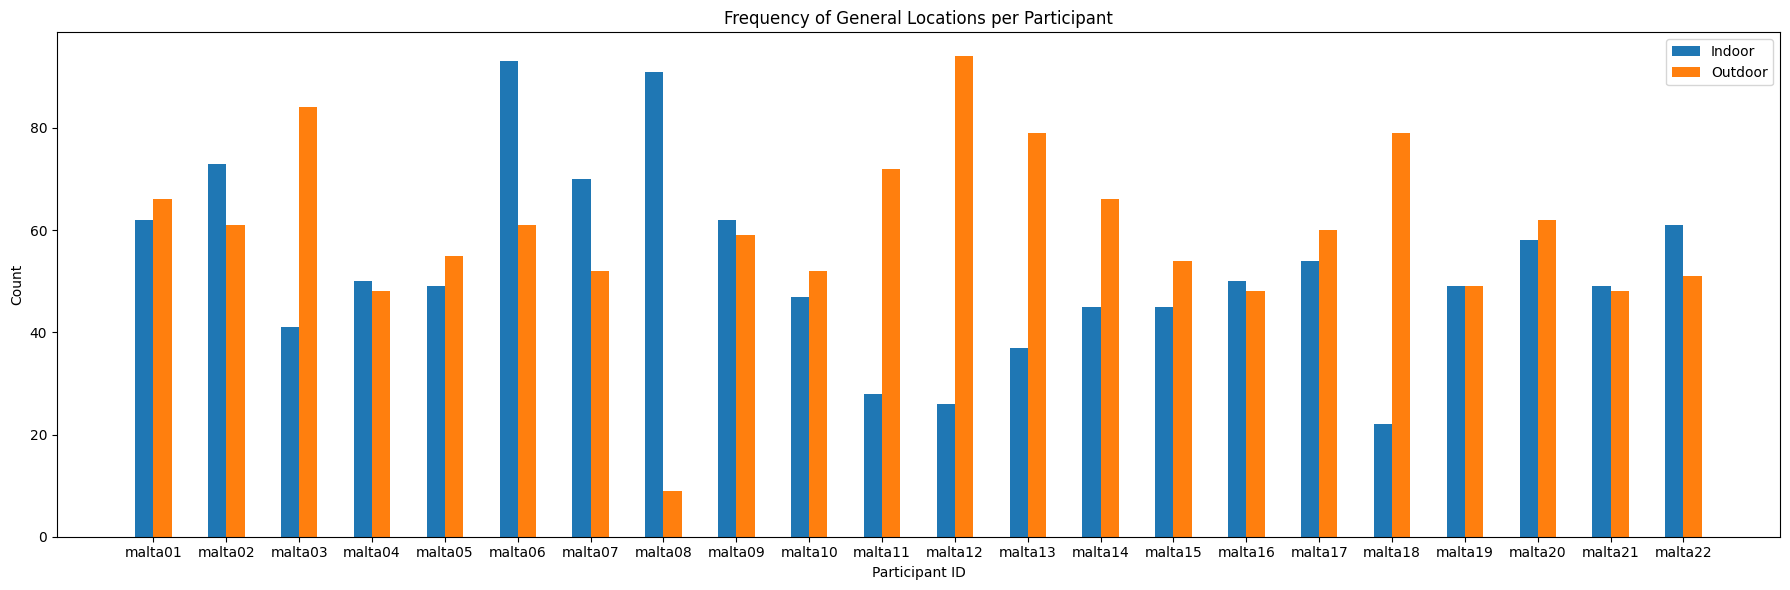

In [26]:
# Group by participant_id and general_location and count occurrences
frequency = labels_copy.groupby(['participant_id', 'general_location']).size().reset_index(name='count')

pivot_df = frequency.pivot(index='participant_id', columns='general_location', values='count').fillna(0)

# Define the position of bars on the x-axis
participants = pivot_df.index
locations = pivot_df.columns
x = range(len(participants))
width = 0.25  # Width of each bar

# Create subplots
fig, ax = plt.subplots(figsize=(18, 6))

# Plot each location
for i, location in enumerate(locations):
    counts = pivot_df[location]
    ax.bar([p + i*width for p in x], counts, width, label=location)

# Add labels and title
ax.set_xlabel('Participant ID')
ax.set_ylabel('Count')
ax.set_title('Frequency of General Locations per Participant')
ax.set_xticks([p + width*(len(locations)-1)/2 for p in x])
ax.set_xticklabels(participants)
ax.legend()

plt.tight_layout()
plt.show()

In [27]:
labels_copy.head()

,datetime,participant_id,general_location
0,2024-03-20 17:57:00,malta01,Indoor
1,2024-03-20 18:32:00,malta01,Indoor
2,2024-03-20 18:46:00,malta01,Indoor
3,2024-03-20 18:56:00,malta01,Indoor
4,2024-03-20 19:17:00,malta01,Indoor


In [47]:
# count by participant_id
labels_copy["participant_id"].value_counts()

participant_id
malta06    154
malta02    134
malta01    128
malta03    125
malta07    122
malta09    121
malta20    120
malta12    120
malta13    116
malta17    114
malta22    112
malta14    111
malta05    104
malta18    101
malta11    100
malta08    100
malta10     99
malta15     99
malta04     98
malta16     98
malta19     98
malta21     97
Name: count, dtype: int64

In [50]:
# compute the standard deviation of count by participant_id
std = labels_copy["participant_id"].value_counts().std()
std

14.840056358628587

In [51]:
# compute the mean of count by participant_id
mean = labels_copy["participant_id"].value_counts().mean()
mean

112.31818181818181

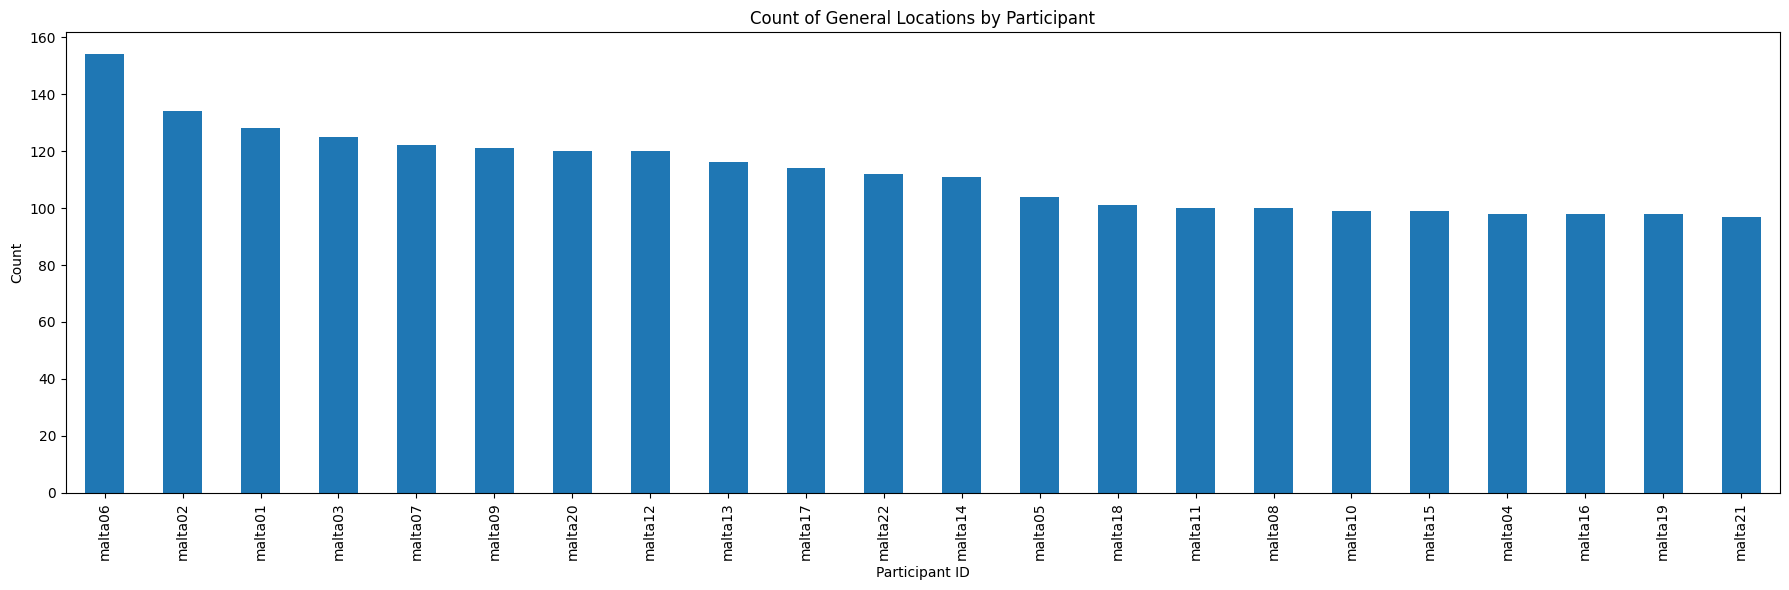

In [48]:
# plot the count by participant_id
labels_copy["participant_id"].value_counts().plot(kind='bar', figsize=(18, 6))
plt.title("Count of General Locations by Participant")
plt.xlabel("Participant ID")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [28]:
print(labels_copy.shape)
labels_copy.head(3)

(2471, 3)


,datetime,participant_id,general_location
0,2024-03-20 17:57:00,malta01,Indoor
1,2024-03-20 18:32:00,malta01,Indoor
2,2024-03-20 18:46:00,malta01,Indoor


# Post cleaning data count

| Data Source               | Number of Records | Number of Columns |
|---------------------------|------------------|------------------|
| Location (Tile + Cozie)   | 100,968          | 4                |
| Physiological             | 90,300           | 8                |
| Survey Responses          | 2,507            | 21               |
| Kestrel                   | 401,936          | 6                |
| Indoor-Outdoor Labels     | 2,471            | 3                |

# Merge Raw Data without target labels

In [29]:
# Left join the location data with the physiological data
df = pd.merge(all_location, cozie_physiological_grouped, on=['datetime', 'participant_id'], how='left')
print("location + physiological",df.shape)

# Left join the location data with the kestrel data
df = pd.merge(df, kestrel, on=['datetime', 'participant_id'], how='left')
print("location + physiological + kestrel",df.shape)

# # Left join the location data with the survey response
# df = pd.merge(df, cozie_watch_survey, on=['datetime', 'participant_id'], how='left')
# print("location + physiological + kestrel + survey",df.shape)

# Display full columns
pd.options.display.max_columns = None
df.head(3)

location + physiological (100968, 10)
location + physiological + kestrel (100968, 14)


,datetime,participant_id,latitude,longitude,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance,temperature,relative_humidity,heat_index,dew_point
0,2024-03-20 17:57:00,malta01,1.303680,103.773538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-20 18:28:00,malta01,1.303622,103.774365,79.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
2,2024-03-20 18:32:00,malta01,1.301342,103.774213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove duplicates

In [30]:
# View which rows are duplicated on datetime and participant_id
df[df.duplicated(subset=['datetime', 'participant_id'], keep=False)].sort_values(by=['datetime', 'participant_id']).head()

,datetime,participant_id,latitude,longitude,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance,temperature,relative_humidity,heat_index,dew_point
2,2024-03-20 18:32:00,malta01,1.301342,103.774213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-20 18:32:00,malta01,1.299036,103.775594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-03-20 18:32:00,malta01,1.298780,103.775585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-03-20 18:32:00,malta01,1.298846,103.775714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-03-20 18:37:00,malta01,1.295821,103.784101,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN


In [31]:
# Create an aggregation dictionary by checking the type of each column.
agg_dict = {}
for col in df.columns:
    # Skip the group-by keys.
    if col in ['datetime', 'participant_id']:
        continue
    # For numeric columns, take the mean
    if pd.api.types.is_numeric_dtype(df[col]):
        agg_dict[col] = 'mean'
    # For non-numeric columns, take the first value
    else:
        agg_dict[col] = 'first'

# Group by 'datetime' and 'participant_id' and aggregate accordingly.
df_deduped = df.groupby(['datetime', 'participant_id'], as_index=False).agg(agg_dict)

In [32]:
# Check duplicates again
df_deduped[df_deduped.duplicated(subset=['datetime', 'participant_id'], keep=False)].sort_values(by=['datetime', 'participant_id']).head()

,datetime,participant_id,latitude,longitude,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance,temperature,relative_humidity,heat_index,dew_point


In [33]:
df_deduped.shape

(74943, 14)

### Missing values - impute for kestrel only

In [34]:
# Missing values percentage
df_deduped.isnull().sum() / df_deduped.shape[0] * 100

datetime                   0.000000
participant_id             0.000000
latitude                   0.000000
longitude                  0.000000
heart_rate                84.550925
heart_rate_resting        99.925277
heart_rate_variability    99.573009
stand_time                95.658033
step_count                93.440348
walking_distance          90.498112
temperature               18.434010
relative_humidity         18.434010
heat_index                18.434010
dew_point                 18.434010
dtype: float64

In [35]:
# List of columns to impute
columns_to_impute = ['temperature', 'relative_humidity', 'heat_index', 'dew_point']

# Impute missing values with the mean
for col in columns_to_impute:
    df_deduped[col] = df_deduped[col].fillna(df_deduped[col].mean())

In [36]:
# Check Missing values percentage again
df_deduped.isnull().sum() / df_deduped.shape[0] * 100

datetime                   0.000000
participant_id             0.000000
latitude                   0.000000
longitude                  0.000000
heart_rate                84.550925
heart_rate_resting        99.925277
heart_rate_variability    99.573009
stand_time                95.658033
step_count                93.440348
walking_distance          90.498112
temperature                0.000000
relative_humidity          0.000000
heat_index                 0.000000
dew_point                  0.000000
dtype: float64

# Feature Engineering

### datetime - hour and day of week

In [37]:
# Extract day of the week as a number (Monday = 1, Sunday = 7)
df_deduped['day_of_week'] = df_deduped['datetime'].dt.weekday + 1 

# Hour of the day
df_deduped['hour_of_day'] = df_deduped['datetime'].dt.hour     

# Display
print(df_deduped.shape)
df_deduped.head(3)

(74943, 16)


,datetime,participant_id,latitude,longitude,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance,temperature,relative_humidity,heat_index,dew_point,day_of_week,hour_of_day
0,2024-03-20 17:57:00,malta01,1.303680,103.773538,NaN,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,17
1,2024-03-20 18:28:00,malta01,1.303622,103.774365,79.0,NaN,NaN,NaN,18.0,NaN,29.298993,69.077737,34.555714,22.836399,3,18
2,2024-03-20 18:32:00,malta01,1.299501,103.775276,NaN,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,18


# Merge with target labels

In [38]:
# inner join labels_copy with df
training_df = pd.merge(df_deduped, labels_copy, on=['datetime', 'participant_id'], how='inner')

#### Training data

In [39]:
print(training_df.shape)
training_df.head(3)

(2471, 17)


,datetime,participant_id,latitude,longitude,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance,temperature,relative_humidity,heat_index,dew_point,day_of_week,hour_of_day,general_location
0,2024-03-20 17:57:00,malta01,1.303680,103.773538,NaN,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,17,Indoor
1,2024-03-20 18:32:00,malta01,1.299501,103.775276,NaN,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,18,Indoor
2,2024-03-20 18:46:00,malta01,1.305428,103.789796,79.0,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,18,Indoor


#### Data that trained model will classify

In [40]:
# drop general_location from training_df
subtract_df = training_df.drop(columns=['general_location'])

# Merge df_deduped with subtract_df, using all columns as keys.
merged_df = df_deduped.merge(subtract_df, how='left', indicator=True)

# Select rows that are only in df_deduped.
unlabeled_df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

In [41]:
print(unlabeled_df.shape)
unlabeled_df.head(3)

(72472, 16)


,datetime,participant_id,latitude,longitude,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance,temperature,relative_humidity,heat_index,dew_point,day_of_week,hour_of_day
1,2024-03-20 18:28:00,malta01,1.303622,103.774365,79.0,NaN,NaN,NaN,18.0,NaN,29.298993,69.077737,34.555714,22.836399,3,18
3,2024-03-20 18:37:00,malta01,1.295121,103.784422,NaN,NaN,NaN,NaN,35.0,NaN,29.298993,69.077737,34.555714,22.836399,3,18
4,2024-03-20 18:43:00,malta01,1.303541,103.787420,NaN,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,18


# Target label encoding

In [42]:
# Encode general_location, indoor as 0, outdoor as 1
training_df['general_location'] = training_df['general_location'].map({'Indoor': 0, 'Outdoor': 1})

# Display
training_df.head(3)

,datetime,participant_id,latitude,longitude,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance,temperature,relative_humidity,heat_index,dew_point,day_of_week,hour_of_day,general_location
0,2024-03-20 17:57:00,malta01,1.303680,103.773538,NaN,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,17,0
1,2024-03-20 18:32:00,malta01,1.299501,103.775276,NaN,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,18,0
2,2024-03-20 18:46:00,malta01,1.305428,103.789796,79.0,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,18,0


# Drop Columns

In [43]:
# Drop datetime and participant_id
training_df = training_df.drop(columns=['datetime'])

# Drop datetime
unlabeled_df = unlabeled_df.drop(columns=['datetime'])

# Final check before save

In [44]:
print(training_df.shape)
training_df.head(3)

(2471, 16)


,participant_id,latitude,longitude,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance,temperature,relative_humidity,heat_index,dew_point,day_of_week,hour_of_day,general_location
0,malta01,1.303680,103.773538,NaN,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,17,0
1,malta01,1.299501,103.775276,NaN,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,18,0
2,malta01,1.305428,103.789796,79.0,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,18,0


In [45]:
print(unlabeled_df.shape)
unlabeled_df.head(3)

(72472, 15)


,participant_id,latitude,longitude,heart_rate,heart_rate_resting,heart_rate_variability,stand_time,step_count,walking_distance,temperature,relative_humidity,heat_index,dew_point,day_of_week,hour_of_day
1,malta01,1.303622,103.774365,79.0,NaN,NaN,NaN,18.0,NaN,29.298993,69.077737,34.555714,22.836399,3,18
3,malta01,1.295121,103.784422,NaN,NaN,NaN,NaN,35.0,NaN,29.298993,69.077737,34.555714,22.836399,3,18
4,malta01,1.303541,103.787420,NaN,NaN,NaN,NaN,NaN,NaN,29.298993,69.077737,34.555714,22.836399,3,18


# Save to csv

In [46]:
# save training_df to csv
training_df.to_csv('training.csv', index=False)

# save unlabeled_df to csv
unlabeled_df.to_csv('unlabeled.csv', index=False)